In [10]:
!pip install matplotlib
!pip install seaborn
!pip install pandas
!pip install scipy

In [2]:
import os
import pandas as pd
import re

# Define the folder containing the CSV files
folder_path = '../Data/SyntheticData'

# Initialize an empty list to store each CSV DataFrame
df_list = []

# Get all CSV filenames in the folder
filenames = [f for f in os.listdir(folder_path) if f.endswith(".csv")]

# Sort filenames based on the numeric part (assuming they are in the format user0.csv, user1.csv, ..., user99.csv)
filenames_sorted = sorted(filenames, key=lambda x: int(re.search(r'\d+', x).group()))

# Loop through the sorted filenames and assign the Patient ID based on the file name
for filename in filenames_sorted:
    file_path = os.path.join(folder_path, filename)
    
    # Read each CSV file into a DataFrame
    df = pd.read_csv(file_path)
    
    # Extract the file name without the '.csv' extension as the Patient ID
    patient_id = filename.replace('.csv', '')
    
    # Add a new column for the Patient ID
    df['Patient ID'] = patient_id
    
    # Append the DataFrame to the list
    df_list.append(df)

# Concatenate all DataFrames into one
combined_df = pd.concat(df_list, ignore_index=True)

# Swap the column names after merging
combined_df.rename(columns={
    'Sleep duration_minutes': 'Temp_column',  # Temporary name
    'Sleep type duration_minutes': 'Sleep duration_minutes',
    'Temp_column': 'Sleep type duration_minutes'
}, inplace=True)

# Show the first few rows of the combined DataFrame after renaming
print(combined_df.head())

# Save to a new CSV file if needed
combined_df.to_csv('combined_synthetic_data_with_patient_ids.csv', index=False)


           Datetime       Code         Activity_Type  \
0  2022=12-08 14:17        NaN  No Physical Activity   
1  2022=12-08 21:05  LA11836-6               Running   
2  2022=12-08 22:01  LA11836-6               Running   
3  2022=12-08 22:06  LA11836-6               Running   
4  2022=12-08 22:16        NaN  No Physical Activity   

   Heart rate___beats/minute  Calories burned_kcal  Exercise duration_s  \
0                       72.0                   NaN                  NaN   
1                      156.0                  20.0              40851.0   
2                      170.0                  30.0              44878.0   
3                      166.0                  20.0              21497.0   
4                       78.0                   NaN                  NaN   

   Temp_column  Sleep duration_minutes  Floors climbed___floors Patient ID  
0          NaN                     NaN                      NaN      User0  
1          NaN                     NaN                    

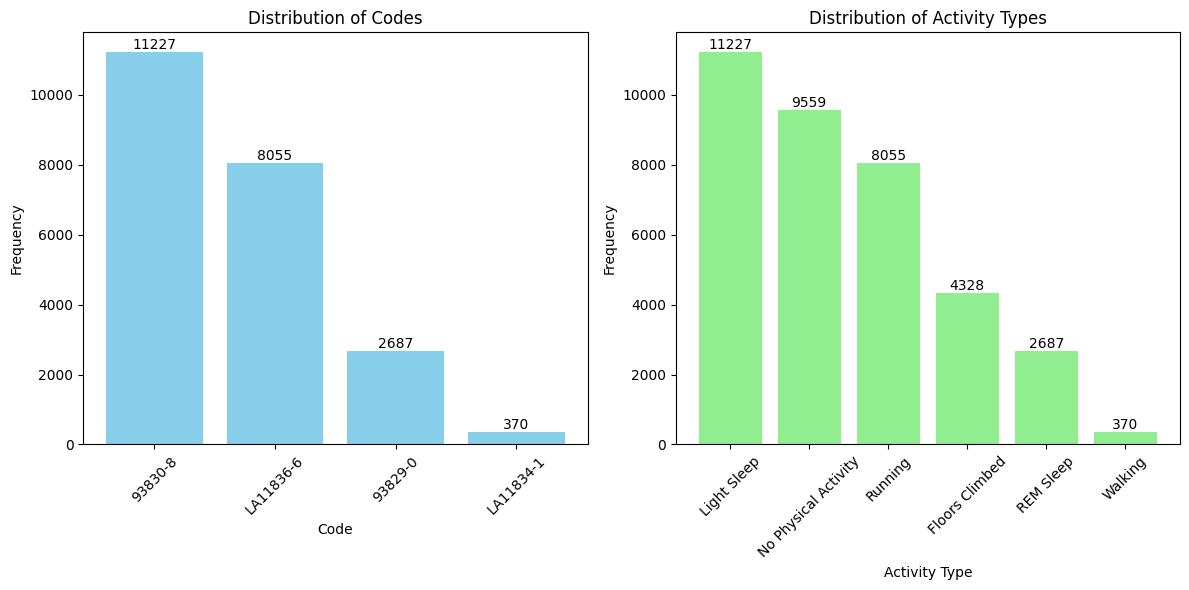

In [3]:
import matplotlib.pyplot as plt

# Get the distribution of the 'Code' column
code_distribution = combined_df['Code'].value_counts()

# Get the distribution of the 'Activity_Type' column
activity_distribution = combined_df['Activity_Type'].value_counts()

# Plotting Code Distribution
plt.figure(figsize=(12, 6))

# Code Distribution Bar Plot
plt.subplot(1, 2, 1)
bars = plt.bar(code_distribution.index, code_distribution.values, color='skyblue')
plt.title('Distribution of Codes')
plt.xlabel('Code')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adding actual numbers on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

# Plotting Activity Type Distribution
plt.subplot(1, 2, 2)
bars = plt.bar(activity_distribution.index, activity_distribution.values, color='lightgreen')
plt.title('Distribution of Activity Types')
plt.xlabel('Activity Type')
plt.ylabel('Frequency')
plt.xticks(rotation=45)

# Adding actual numbers on bars
for bar in bars:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), ha='center', va='bottom')

plt.tight_layout()
plt.savefig('Code_and_Activity_Distribution.png', format='png')

plt.show()


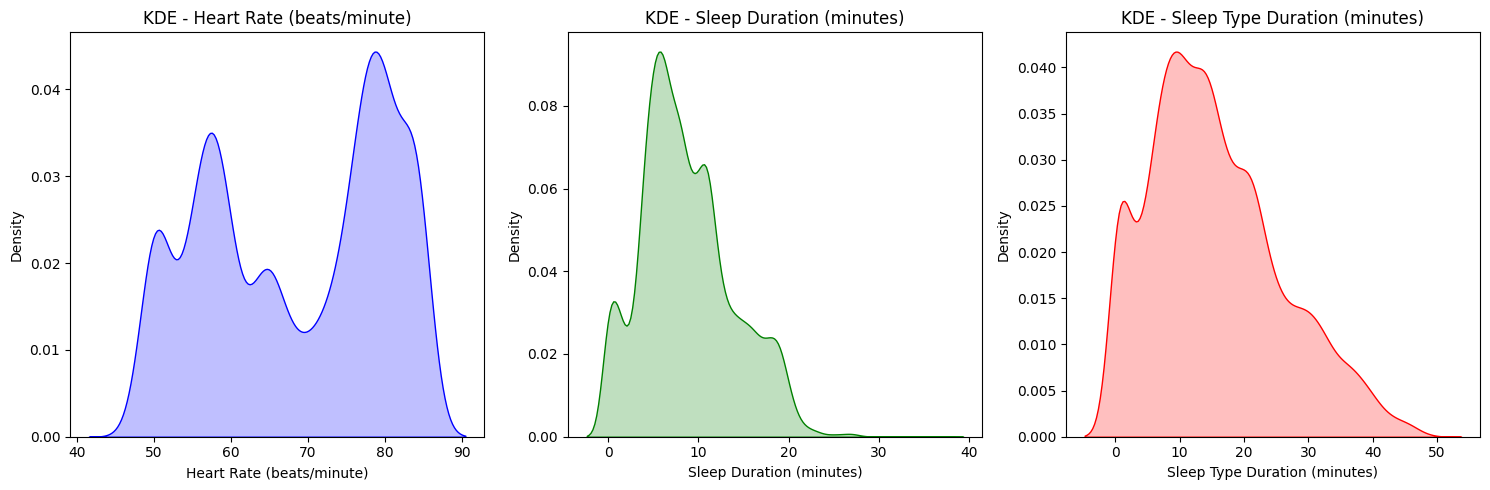

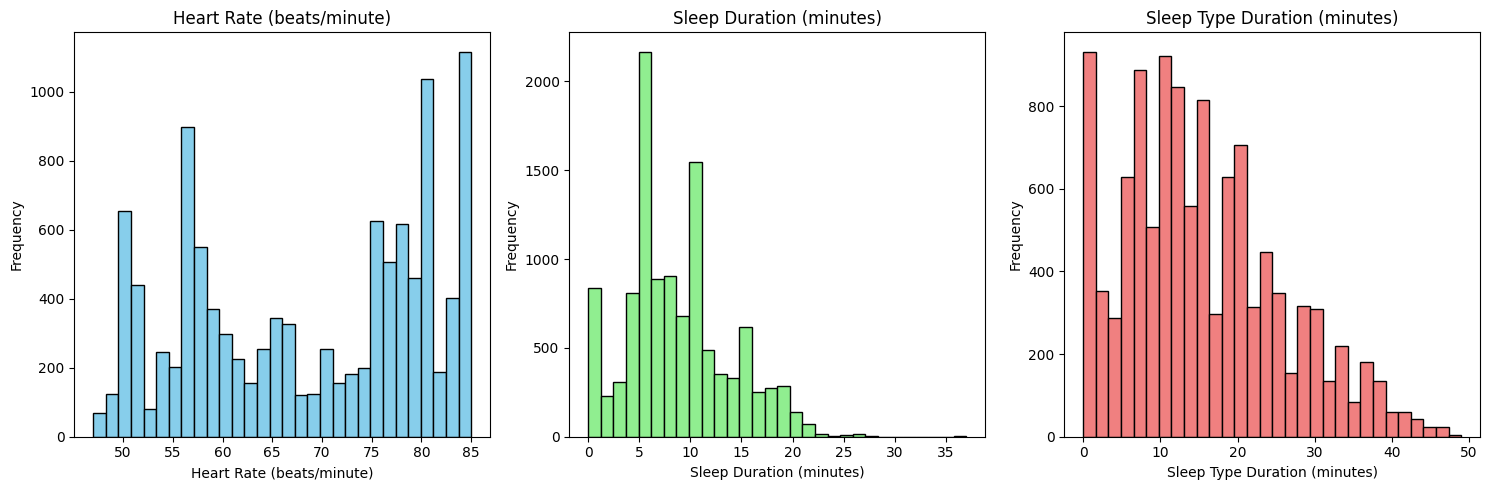

In [4]:
#light sleep analysis 
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = combined_df[combined_df['Code'] == '93830-8']

# Set up the figure
plt.figure(figsize=(15, 5))

# KDE plot for Heart Rate
plt.subplot(1, 3, 1)
sns.kdeplot(filtered_df['Heart rate___beats/minute'].dropna(), color='blue', fill=True)
plt.title('KDE - Heart Rate (beats/minute)')
plt.xlabel('Heart Rate (beats/minute)')
plt.ylabel('Density')

# KDE plot for Sleep Duration
plt.subplot(1, 3, 2)
sns.kdeplot(filtered_df['Sleep duration_minutes'].dropna(), color='green', fill=True)
plt.title('KDE - Sleep Duration (minutes)')
plt.xlabel('Sleep Duration (minutes)')
plt.ylabel('Density')

# KDE plot for Sleep Type Duration
plt.subplot(1, 3, 3)
sns.kdeplot(filtered_df['Sleep type duration_minutes'].dropna(), color='red', fill=True)
plt.title('KDE - Sleep Type Duration (minutes)')
plt.xlabel('Sleep Type Duration (minutes)')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.savefig('light_sleep_Distribution.png', format='png')

plt.show()

# Plot distributions for Heart rate, Sleep duration, and Sleep type duration
plt.figure(figsize=(15, 5))

# Heart rate distribution
plt.subplot(1, 3, 1)
plt.hist(filtered_df['Heart rate___beats/minute'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Heart Rate (beats/minute)')
plt.xlabel('Heart Rate (beats/minute)')
plt.ylabel('Frequency')

# Sleep duration distribution
plt.subplot(1, 3, 2)
plt.hist(filtered_df['Sleep duration_minutes'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Sleep Duration (minutes)')
plt.xlabel('Sleep Duration (minutes)')
plt.ylabel('Frequency')

# Sleep type duration distribution
plt.subplot(1, 3, 3)
plt.hist(filtered_df['Sleep type duration_minutes'].dropna(), bins=30, color='lightcoral', edgecolor='black')
plt.title('Sleep Type Duration (minutes)')
plt.xlabel('Sleep Type Duration (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('light_sleep_Statistic.png', format='png')
plt.show()

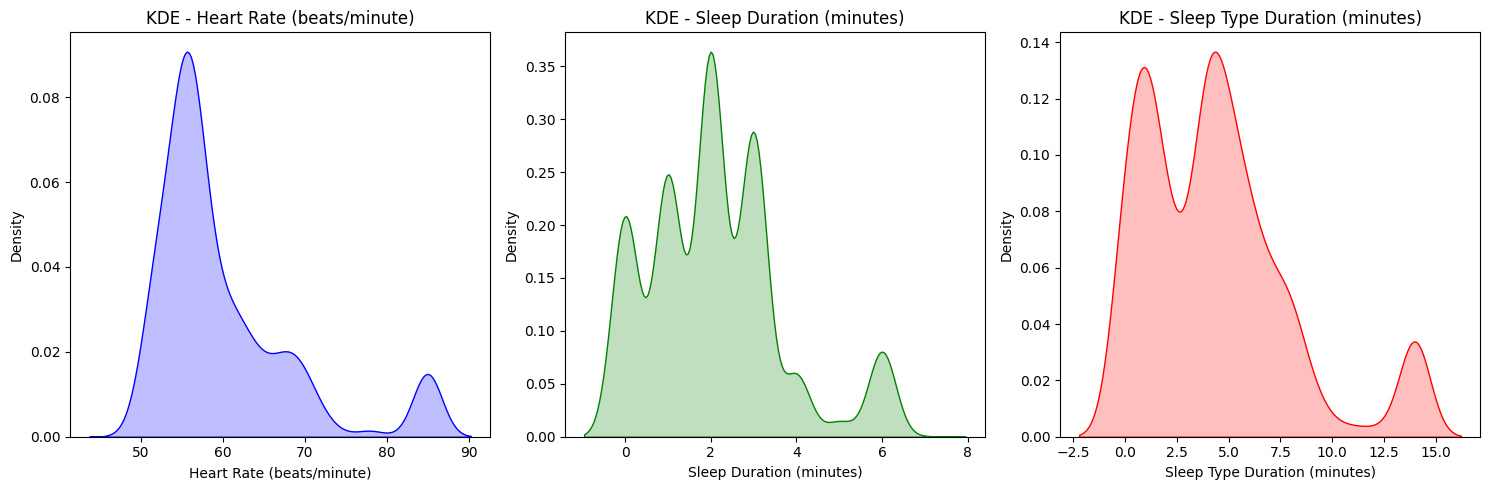

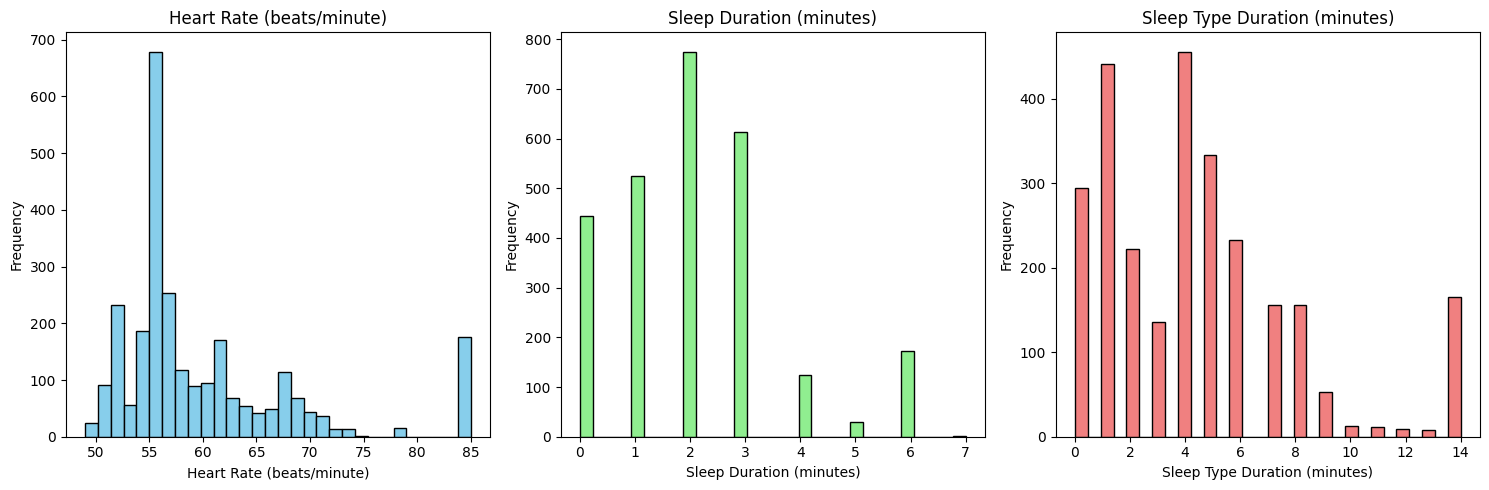

In [5]:
#REM sleep analysis 
import matplotlib.pyplot as plt
import seaborn as sns

filtered_df = combined_df[combined_df['Code'] == '93829-0']

# Set up the figure
plt.figure(figsize=(15, 5))

# KDE plot for Heart Rate
plt.subplot(1, 3, 1)
sns.kdeplot(filtered_df['Heart rate___beats/minute'].dropna(), color='blue', fill=True)
plt.title('KDE - Heart Rate (beats/minute)')
plt.xlabel('Heart Rate (beats/minute)')
plt.ylabel('Density')

# KDE plot for Sleep Duration
plt.subplot(1, 3, 2)
sns.kdeplot(filtered_df['Sleep duration_minutes'].dropna(), color='green', fill=True)
plt.title('KDE - Sleep Duration (minutes)')
plt.xlabel('Sleep Duration (minutes)')
plt.ylabel('Density')

# KDE plot for Sleep Type Duration
plt.subplot(1, 3, 3)
sns.kdeplot(filtered_df['Sleep type duration_minutes'].dropna(), color='red', fill=True)
plt.title('KDE - Sleep Type Duration (minutes)')
plt.xlabel('Sleep Type Duration (minutes)')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.savefig('REM_sleep_Distribution.png', format='png')

plt.show()

# Plot distributions for Heart rate, Sleep duration, and Sleep type duration
plt.figure(figsize=(15, 5))

# Heart rate distribution
plt.subplot(1, 3, 1)
plt.hist(filtered_df['Heart rate___beats/minute'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Heart Rate (beats/minute)')
plt.xlabel('Heart Rate (beats/minute)')
plt.ylabel('Frequency')

# Sleep duration distribution
plt.subplot(1, 3, 2)
plt.hist(filtered_df['Sleep duration_minutes'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Sleep Duration (minutes)')
plt.xlabel('Sleep Duration (minutes)')
plt.ylabel('Frequency')

# Sleep type duration distribution
plt.subplot(1, 3, 3)
plt.hist(filtered_df['Sleep type duration_minutes'].dropna(), bins=30, color='lightcoral', edgecolor='black')
plt.title('Sleep Type Duration (minutes)')
plt.xlabel('Sleep Type Duration (minutes)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('REM_sleep_Statistic.png', format='png')

plt.show()

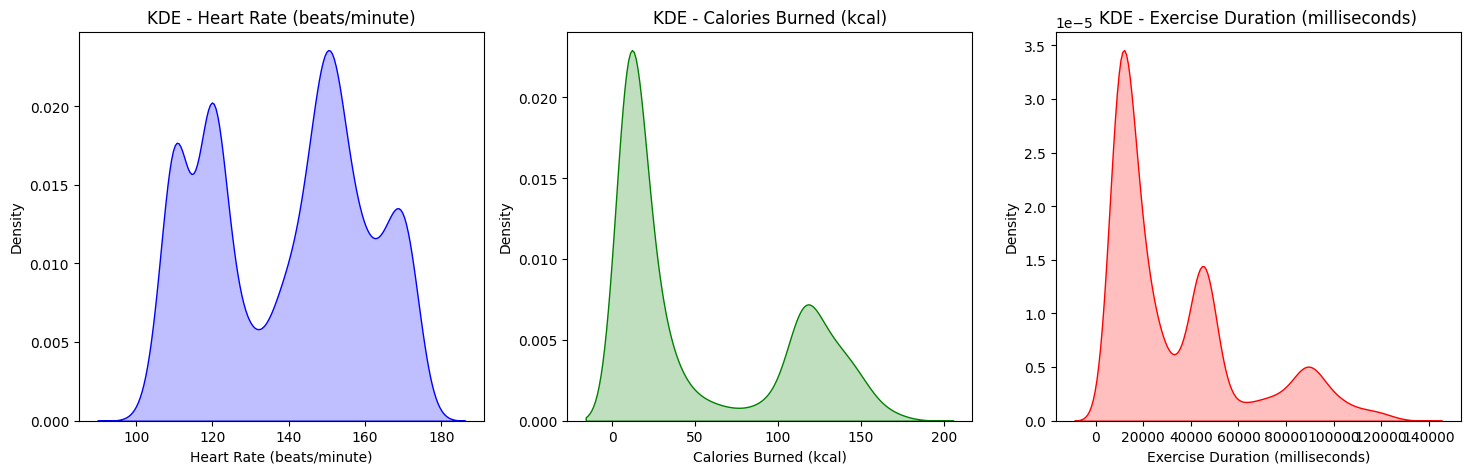

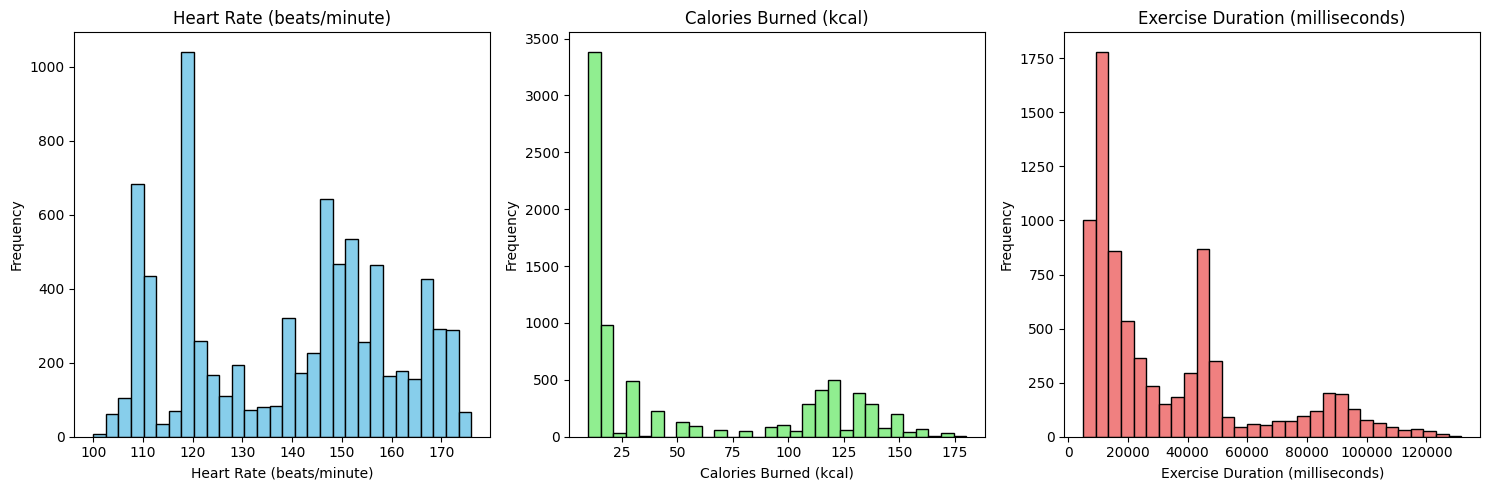

In [6]:
#Running analysis 
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for Code = 'LA11836-6'
filtered_df = combined_df[combined_df['Code'] == 'LA11836-6']

# Set up the figure
plt.figure(figsize=(15, 5))

# KDE plot for Heart Rate
plt.subplot(1, 3, 1)
sns.kdeplot(filtered_df['Heart rate___beats/minute'].dropna(), color='blue', fill=True)
plt.title('KDE - Heart Rate (beats/minute)')
plt.xlabel('Heart Rate (beats/minute)')
plt.ylabel('Density')

# KDE plot for Calories Burned
plt.subplot(1, 3, 2)
sns.kdeplot(filtered_df['Calories burned_kcal'].dropna(), color='green', fill=True)
plt.title('KDE - Calories Burned (kcal)')
plt.xlabel('Calories Burned (kcal)')
plt.ylabel('Density')

# KDE plot for Exercise Duration
plt.subplot(1, 3, 3)
sns.kdeplot(filtered_df['Exercise duration_s'].dropna(), color='red', fill=True)
plt.title('KDE - Exercise Duration (milliseconds)')
plt.xlabel('Exercise Duration (milliseconds)')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.savefig('Running Distribution.png', format='png')
plt.show()

# Plot distributions (Histograms)
plt.figure(figsize=(15, 5))

# Heart Rate Distribution
plt.subplot(1, 3, 1)
plt.hist(filtered_df['Heart rate___beats/minute'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Heart Rate (beats/minute)')
plt.xlabel('Heart Rate (beats/minute)')
plt.ylabel('Frequency')

# Calories Burned Distribution
plt.subplot(1, 3, 2)
plt.hist(filtered_df['Calories burned_kcal'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Calories Burned (kcal)')
plt.xlabel('Calories Burned (kcal)')
plt.ylabel('Frequency')

# Exercise Duration Distribution
plt.subplot(1, 3, 3)
plt.hist(filtered_df['Exercise duration_s'].dropna(), bins=30, color='lightcoral', edgecolor='black')
plt.title('Exercise Duration (milliseconds)')
plt.xlabel('Exercise Duration (milliseconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('Running Statistic.png', format='png')
plt.show()


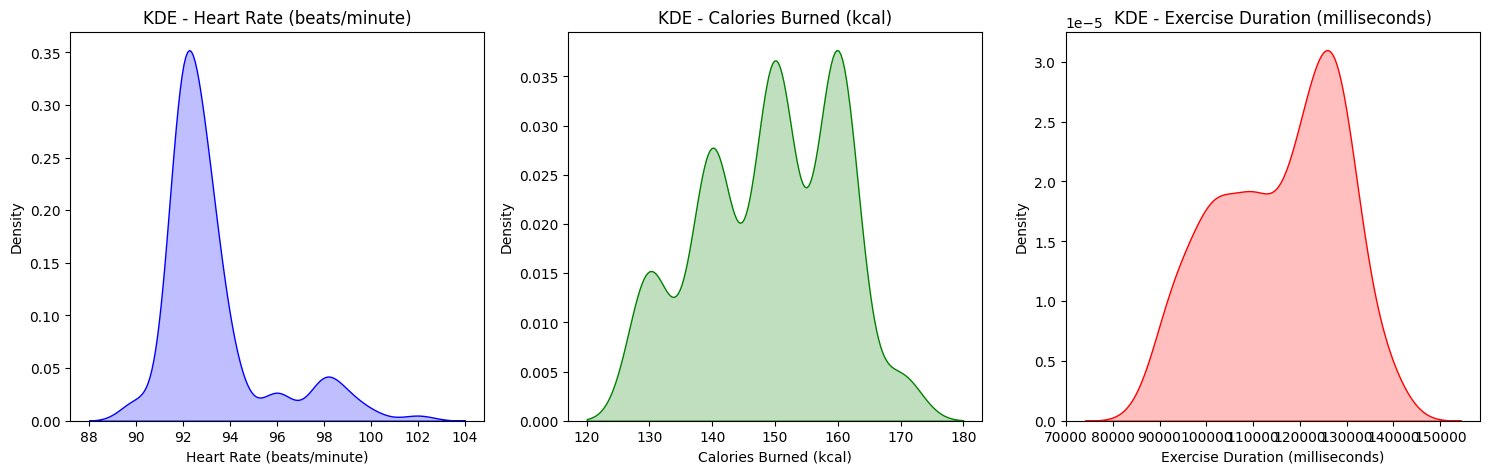

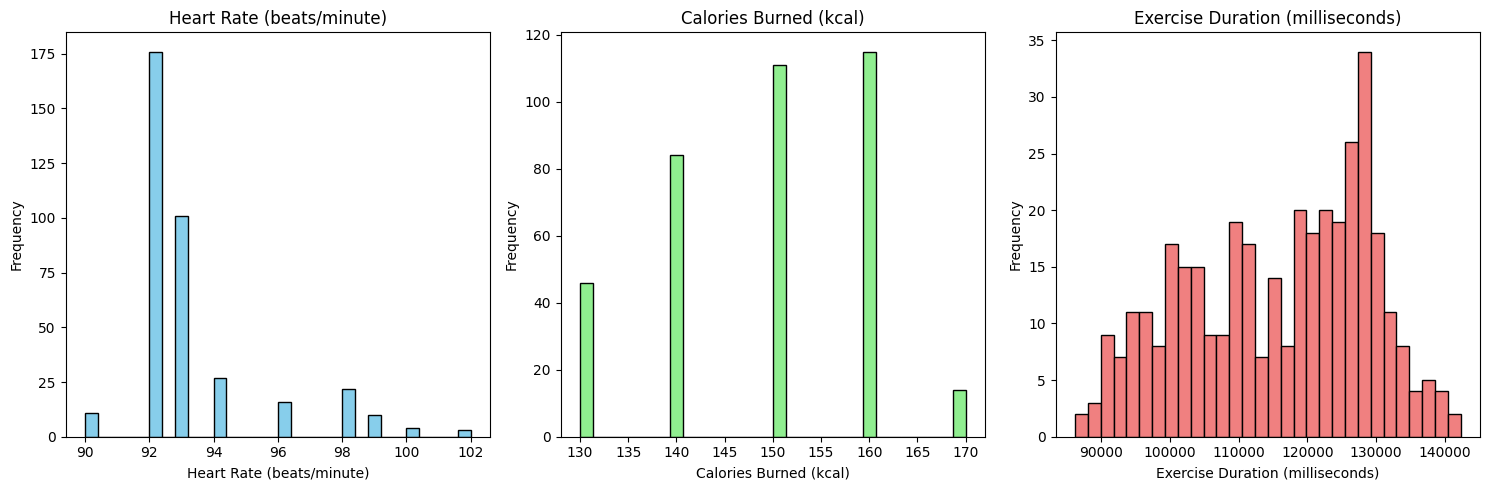

In [7]:
#Walking analysis 
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for Code = 'LA11834-1'
filtered_df = combined_df[combined_df['Code'] == 'LA11834-1']

# Set up the figure
plt.figure(figsize=(15, 5))

# KDE plot for Heart Rate
plt.subplot(1, 3, 1)
sns.kdeplot(filtered_df['Heart rate___beats/minute'].dropna(), color='blue', fill=True)
plt.title('KDE - Heart Rate (beats/minute)')
plt.xlabel('Heart Rate (beats/minute)')
plt.ylabel('Density')

# KDE plot for Calories Burned
plt.subplot(1, 3, 2)
sns.kdeplot(filtered_df['Calories burned_kcal'].dropna(), color='green', fill=True)
plt.title('KDE - Calories Burned (kcal)')
plt.xlabel('Calories Burned (kcal)')
plt.ylabel('Density')

# KDE plot for Exercise Duration
plt.subplot(1, 3, 3)
sns.kdeplot(filtered_df['Exercise duration_s'].dropna(), color='red', fill=True)
plt.title('KDE - Exercise Duration (milliseconds)')
plt.xlabel('Exercise Duration (milliseconds)')
plt.ylabel('Density')

# Adjust layout
plt.tight_layout()
plt.savefig('Walking Distribution.png', format='png')
plt.show()

# Plot distributions (Histograms)
plt.figure(figsize=(15, 5))

# Heart Rate Distribution
plt.subplot(1, 3, 1)
plt.hist(filtered_df['Heart rate___beats/minute'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Heart Rate (beats/minute)')
plt.xlabel('Heart Rate (beats/minute)')
plt.ylabel('Frequency')

# Calories Burned Distribution
plt.subplot(1, 3, 2)
plt.hist(filtered_df['Calories burned_kcal'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Calories Burned (kcal)')
plt.xlabel('Calories Burned (kcal)')
plt.ylabel('Frequency')

# Exercise Duration Distribution
plt.subplot(1, 3, 3)
plt.hist(filtered_df['Exercise duration_s'].dropna(), bins=30, color='lightcoral', edgecolor='black')
plt.title('Exercise Duration (milliseconds)')
plt.xlabel('Exercise Duration (milliseconds)')
plt.ylabel('Frequency')

plt.tight_layout()
plt.savefig('Walking Statistic.png', format='png')
plt.show()


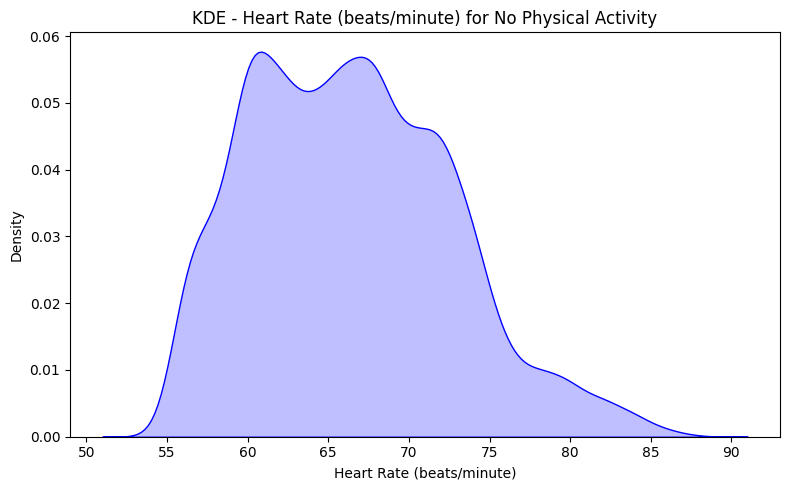

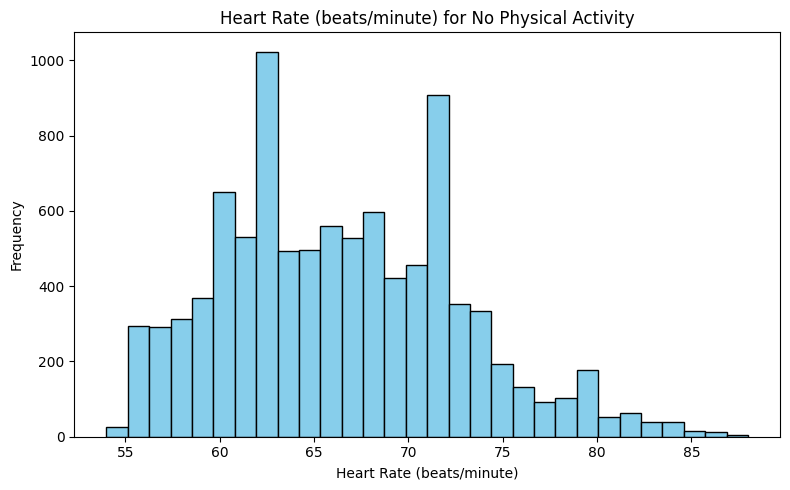

In [8]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for Activity_Type = 'No Physical Activity'
filtered_df = combined_df[combined_df['Activity_Type'] == 'No Physical Activity']

# Set up the figure for KDE plot
plt.figure(figsize=(8, 5))

# KDE plot for Heart Rate
sns.kdeplot(filtered_df['Heart rate___beats/minute'].dropna(), color='blue', fill=True)
plt.title('KDE - Heart Rate (beats/minute) for No Physical Activity')
plt.xlabel('Heart Rate (beats/minute)')
plt.ylabel('Density')

# Save and show the plot
plt.tight_layout()
plt.savefig('No_Physical_Activity_HeartRate_Distribution.png', format='png')
plt.show()

# Set up the figure for the histogram
plt.figure(figsize=(8, 5))

# Heart Rate Distribution (Histogram)
plt.hist(filtered_df['Heart rate___beats/minute'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Heart Rate (beats/minute) for No Physical Activity')
plt.xlabel('Heart Rate (beats/minute)')
plt.ylabel('Frequency')

# Save and show the plot
plt.tight_layout()
plt.savefig('No_Physical_Activity_HeartRate_Statistic.png', format='png')
plt.show()


/var/folders/g5/kzk9x84j0675h882n5w4g1_c0000gn/T/ipykernel_83633/2843165804.py:19: UserWarning: Dataset has 0 variance; skipping density estimate. Pass `warn_singular=False` to disable this warning.
  sns.kdeplot(filtered_df['Floors climbed___floors'].dropna(), color='green', fill=True)


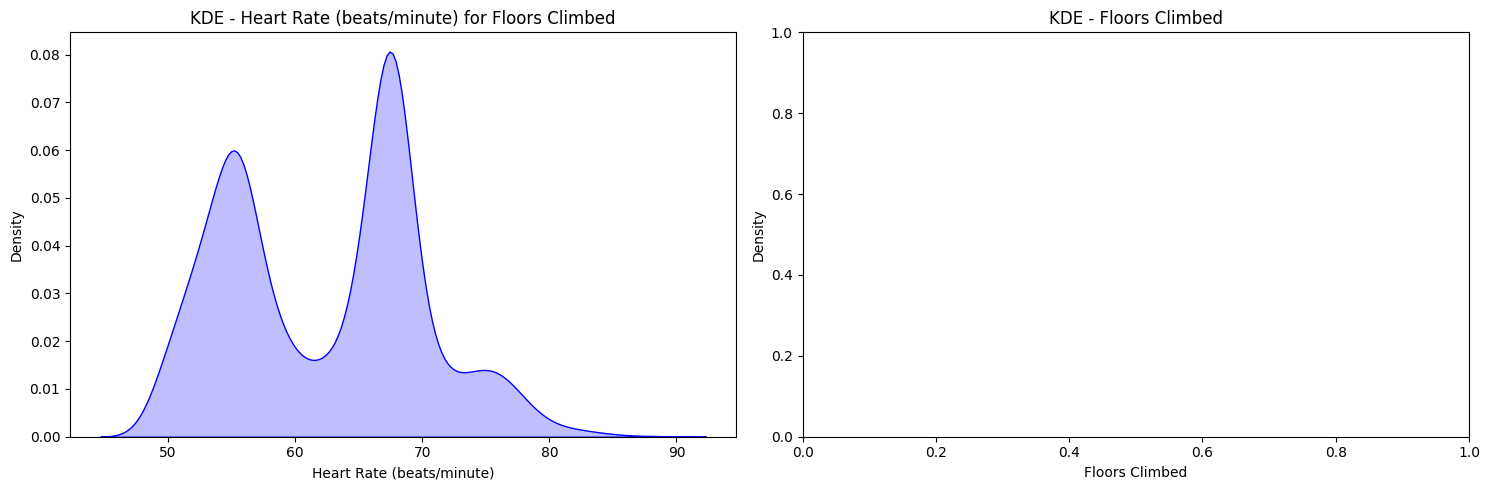

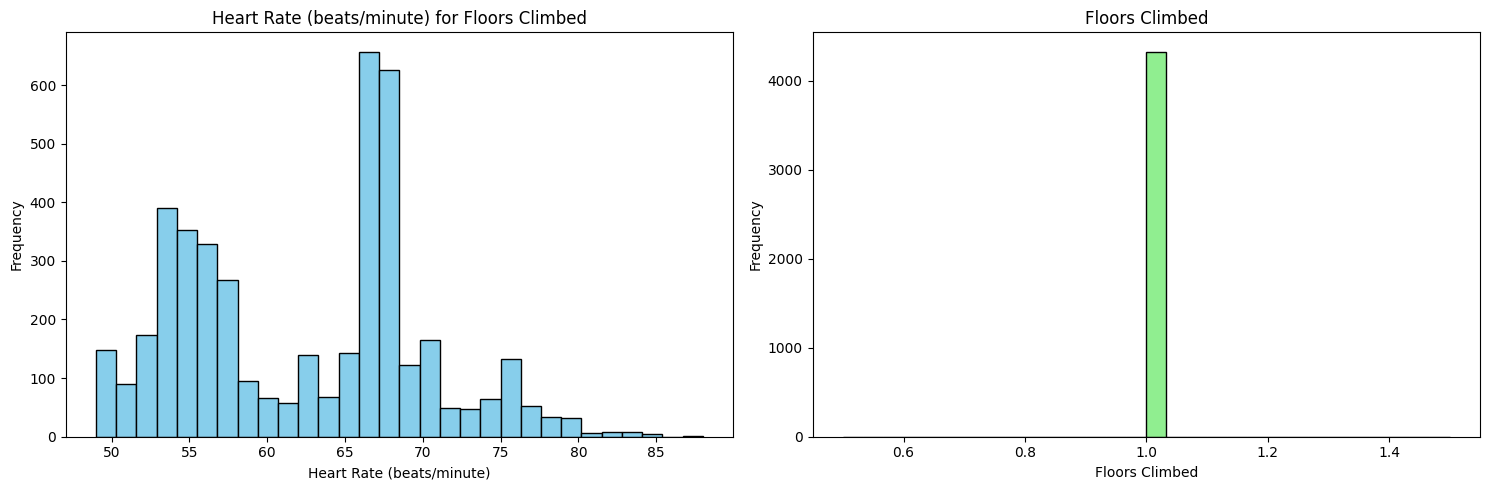

In [9]:
import matplotlib.pyplot as plt
import seaborn as sns

# Filter the data for Activity_Type = 'Floors Climbed'
filtered_df = combined_df[combined_df['Activity_Type'] == 'Floors Climbed']

# Set up the figure for KDE plots
plt.figure(figsize=(15, 5))

# KDE plot for Heart Rate
plt.subplot(1, 2, 1)
sns.kdeplot(filtered_df['Heart rate___beats/minute'].dropna(), color='blue', fill=True)
plt.title('KDE - Heart Rate (beats/minute) for Floors Climbed')
plt.xlabel('Heart Rate (beats/minute)')
plt.ylabel('Density')

# KDE plot for Floors Climbed
plt.subplot(1, 2, 2)
sns.kdeplot(filtered_df['Floors climbed___floors'].dropna(), color='green', fill=True)
plt.title('KDE - Floors Climbed')
plt.xlabel('Floors Climbed')
plt.ylabel('Density')

# Save and show the KDE plots
plt.tight_layout()
plt.savefig('Floors_Climbed_HeartRate_FloorsClimbed_Distribution.png', format='png')
plt.show()

# Set up the figure for histograms
plt.figure(figsize=(15, 5))

# Heart Rate Distribution (Histogram)
plt.subplot(1, 2, 1)
plt.hist(filtered_df['Heart rate___beats/minute'].dropna(), bins=30, color='skyblue', edgecolor='black')
plt.title('Heart Rate (beats/minute) for Floors Climbed')
plt.xlabel('Heart Rate (beats/minute)')
plt.ylabel('Frequency')

# Floors Climbed Distribution (Histogram)
plt.subplot(1, 2, 2)
plt.hist(filtered_df['Floors climbed___floors'].dropna(), bins=30, color='lightgreen', edgecolor='black')
plt.title('Floors Climbed')
plt.xlabel('Floors Climbed')
plt.ylabel('Frequency')

# Save and show the histogram plots
plt.tight_layout()
plt.savefig('Floors_Climbed_HeartRate_FloorsClimbed_Statistic.png', format='png')
plt.show()


In [ ]:
#strategy to generate Synthetic data
#step 1: generate number of timepoint in given time range
#step 2: generate the 

In [19]:
import pandas as pd
import numpy as np

def generate_ordered_datetimes(input_file):
    # Load the data
    df = pd.read_csv(input_file)

    # Convert the Datetime column to datetime type
    df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y=%m-%d %H:%M')

    # Get the start and end of the datetime range
    start_datetime = df['Datetime'].min()
    end_datetime = df['Datetime'].max()

    # Count the number of rows for each Patient ID
    patient_distribution = df['Patient ID'].value_counts()

    # Calculate statistics
    stats = {
        'Mean': int(patient_distribution.mean()),
        'Median': int(patient_distribution.median()),
        'Mode': int(patient_distribution.mode()[0]),
        'Standard Deviation': int(patient_distribution.std()),
        'Min': int(patient_distribution.min()),
        'Max': int(patient_distribution.max())
    }

    print("Statistics of Row Distribution by Patient ID:")
    for stat, value in stats.items():
        print(f"{stat}: {value}")

    # Generate new ordered datetimes
    num_examples_1 = stats['Mean']
    num_examples_2 = stats['Mode']

    # Generate ordered datetimes
    new_datetimes_1 = pd.date_range(start=start_datetime, periods=num_examples_1, freq='T')
    new_datetimes_2 = pd.date_range(start=start_datetime, periods=num_examples_2, freq='T')

    # Create DataFrames for each set of new datetimes
    new_df_1 = pd.DataFrame({
        'Datetime': new_datetimes_1,
        'Patient ID': [f'Patient_{i+1}' for i in range(num_examples_1)],
        'Activity_Type': ['Light Sleep'] * num_examples_1,  # Example activity type
        'Heart rate___beats/minute': np.random.randint(50, 100, num_examples_1),
        'Calories burned_kcal': np.random.randint(0, 100, num_examples_1),
        'Exercise duration_s': np.random.randint(0, 3600, num_examples_1),
        'Sleep duration_minutes': np.random.randint(0, 120, num_examples_1),
        'Sleep type duration_minutes': np.random.randint(0, 60, num_examples_1),
        'Floors climbed___floors': np.random.randint(0, 10, num_examples_1),
    })

    new_df_2 = pd.DataFrame({
        'Datetime': new_datetimes_2,
        'Patient ID': [f'Patient_{i+1}' for i in range(num_examples_2)],
        'Activity_Type': ['REM Sleep'] * num_examples_2,  # Example activity type
        'Heart rate___beats/minute': np.random.randint(50, 100, num_examples_2),
        'Calories burned_kcal': np.random.randint(0, 100, num_examples_2),
        'Exercise duration_s': np.random.randint(0, 3600, num_examples_2),
        'Sleep duration_minutes': np.random.randint(0, 120, num_examples_2),
        'Sleep type duration_minutes': np.random.randint(0, 60, num_examples_2),
        'Floors climbed___floors': np.random.randint(0, 10, num_examples_2),
    })

    # Save the new DataFrames to CSV files
    new_df_1.to_csv('new_patient_data_mean1.csv', index=False)
    new_df_2.to_csv('new_patient_data_mode2.csv', index=False)

    print("\nNew CSV files generated:")
    print("1. new_patient_data_mean.csv with", num_examples_1, "rows.")
    print("2. new_patient_data_mode.csv with", num_examples_2, "rows.")

# Example usage
generate_ordered_datetimes('combined_synthetic_data_with_patient_ids.csv')


Statistics of Row Distribution by Patient ID:
Mean: 362
Median: 360
Mode: 346
Standard Deviation: 41
Min: 258
Max: 487

New CSV files generated:
1. new_patient_data_mean.csv with 362 rows.
2. new_patient_data_mode.csv with 346 rows.


/var/folders/g5/kzk9x84j0675h882n5w4g1_c0000gn/T/ipykernel_83633/1073448176.py:37: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_datetimes_1 = pd.date_range(start=start_datetime, periods=num_examples_1, freq='T')
/var/folders/g5/kzk9x84j0675h882n5w4g1_c0000gn/T/ipykernel_83633/1073448176.py:38: FutureWarning: 'T' is deprecated and will be removed in a future version, please use 'min' instead.
  new_datetimes_2 = pd.date_range(start=start_datetime, periods=num_examples_2, freq='T')


In [21]:
import numpy as np

def generate_random_integers(mean, std_dev, min_val, max_val, num_samples):
    # Generate random numbers from a normal distribution
    random_numbers = np.random.normal(loc=mean, scale=std_dev, size=num_samples)

    # Round the values to the nearest integer
    random_numbers = np.round(random_numbers).astype(int)

    # Truncate values to stay within min and max
    random_numbers = np.clip(random_numbers, min_val, max_val)

    # Return the generated numbers
    return random_numbers

# Parameters based on the provided statistics
mean = 362
std_dev = 41
min_val = 258
max_val = 487
num_samples = 1000  # Adjust this for the number of samples you want to generate

# Generate random integers
generated_integers = generate_random_integers(mean, std_dev, min_val, max_val, num_samples)

# Display the first 10 generated integers
print(generated_integers[:10])


[306 443 366 412 392 369 401 392 342 367]


In [22]:
import pandas as pd
import numpy as np

def extract_patient_stats_and_generate_numbers(input_file, num_samples):
    # Load the data
    df = pd.read_csv(input_file)

    # Convert the Datetime column to datetime type
    df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y=%m-%d %H:%M')

    # Count the number of rows for each Patient ID
    patient_distribution = df['Patient ID'].value_counts()

    # Calculate statistics
    stats = {
        'Mean': int(patient_distribution.mean()),
        'Median': int(patient_distribution.median()),
        'Mode': int(patient_distribution.mode()[0]),
        'Standard Deviation': int(patient_distribution.std()),
        'Min': int(patient_distribution.min()),
        'Max': int(patient_distribution.max())
    }

    # Generate random integers based on the statistics
    random_numbers = generate_random_integers(
        mean=stats['Mean'],
        std_dev=stats['Standard Deviation'],
        min_val=stats['Min'],
        max_val=stats['Max'],
        num_samples=num_samples
    )

    return stats, random_numbers

def generate_random_integers(mean, std_dev, min_val, max_val, num_samples):
    # Generate random numbers from a normal distribution
    random_numbers = np.random.normal(loc=mean, scale=std_dev, size=num_samples)

    # Round the values to the nearest integer
    random_numbers = np.round(random_numbers).astype(int)

    # Truncate values to stay within min and max
    random_numbers = np.clip(random_numbers, min_val, max_val)

    # Return the generated numbers
    return random_numbers

# Example usage
input_file = 'combined_synthetic_data_with_patient_ids.csv'
num_samples = 10  # Set the number of random samples you want to generate
stats, random_numbers = extract_patient_stats_and_generate_numbers(input_file, num_samples)

# Print the results
print("Statistics of Row Distribution by Patient ID:")
for stat, value in stats.items():
    print(f"{stat}: {value}")

print("\nGenerated Random Numbers:")
print(random_numbers)


Statistics of Row Distribution by Patient ID:
Mean: 362
Median: 360
Mode: 346
Standard Deviation: 41
Min: 258
Max: 487

Generated Random Numbers:
[356 436 377 308 404 348 392 407 368 340]


In [27]:
import pandas as pd
import numpy as np

def generate_datetime_distribution_with_noise(input_file, output_file, noise_level=0.0):
    # Load the data
    df = pd.read_csv(input_file)

    # Convert the Datetime column to datetime type
    df['Datetime'] = pd.to_datetime(df['Datetime'], format='%Y=%m-%d %H:%M')

    # Calculate the time intervals between consecutive Datetime entries
    time_intervals = df['Datetime'].diff().dropna()

    # Generate new Datetimes based on the original Datetime values and the calculated intervals
    new_datetimes = [df['Datetime'].iloc[0]]  # Start with the first datetime

    for interval in time_intervals:
        # Convert interval to seconds
        interval_seconds = interval.total_seconds()

        # Generate noise and apply it to the interval
        noise = np.random.normal(0, noise_level)  # Gaussian noise
        noisy_interval_seconds = interval_seconds + noise

        # Ensure the new interval is not negative
        noisy_interval_seconds = max(0, noisy_interval_seconds)

        # Create a new datetime by adding the noisy interval
        new_datetimes.append(new_datetimes[-1] + pd.Timedelta(seconds=noisy_interval_seconds))

    # Create a new DataFrame with the generated Datetimes
    new_df = pd.DataFrame({'Datetime': new_datetimes})

    # Format the Datetime to match the original format
    new_df['Datetime'] = new_df['Datetime'].dt.strftime('%Y=%m-%d %H:%M')

    # Save the new DataFrame to a CSV file
    new_df.to_csv(output_file, index=False)

    print(f"New CSV file with datetime distribution and noise generated: {output_file}")

# Example usage
input_file = 'combined_synthetic_data_with_patient_ids.csv'  # Your input file name
output_file = 'new_datetime_distribution_with_noise.csv'  # Output file name
noise_level = 10  # Adjust noise level (standard deviation for Gaussian noise)
generate_datetime_distribution_with_noise(input_file, output_file, noise_level)


New CSV file with datetime distribution and noise generated: new_datetime_distribution_with_noise.csv


In [9]:
import numpy as np
from scipy.stats import norm, lognorm
import matplotlib.pyplot as plt

# Fit the distributions for the three columns
heart_rate_data = combined_df['Heart rate___beats/minute'].dropna()
sleep_duration_data = combined_df['Sleep duration_minutes'].dropna()
sleep_type_duration_data = combined_df['Sleep type duration_minutes'].dropna()

# Fit normal distribution
hr_mu, hr_std = norm.fit(heart_rate_data)  # Mean and std for Heart rate
sleep_mu, sleep_std = norm.fit(sleep_duration_data)  # Mean and std for Sleep duration
sleep_type_mu, sleep_type_std = norm.fit(sleep_type_duration_data)  # Mean and std for Sleep type duration

# Print out the parameters of the distributions
print(f'Heart rate: Mean = {hr_mu}, Std Dev = {hr_std}')
print(f'Sleep duration: Mean = {sleep_mu}, Std Dev = {sleep_std}')
print(f'Sleep type duration: Mean = {sleep_type_mu}, Std Dev = {sleep_type_std}')


Heart rate: Mean = 82.65127256666483, Std Dev = 33.077806255381326
Sleep duration: Mean = 7.42496765847348, Std Dev = 5.31953101797686
Sleep type duration: Mean = 13.31824062095731, Std Dev = 10.278432347400091


In [12]:
#Evaluation with wasserstein_distance
import pandas as pd
from scipy.stats import wasserstein_distance

def evaluate_wasserstein_distance(csv_file1, csv_file2, columns):
    """
    Evaluate the Wasserstein distance for specified numerical columns between two CSV files.

    :param csv_file1: Path to the first CSV file
    :param csv_file2: Path to the second CSV file
    :param columns: List of column names to calculate the Wasserstein distance
    :return: Dictionary containing the Wasserstein distance for each specified column
    """
    # Load the CSV files into DataFrames
    df1 = pd.read_csv(csv_file1)
    df2 = pd.read_csv(csv_file2)

    # Initialize a dictionary to store the distances
    distances = {}

    # Iterate over each column and calculate the Wasserstein distance
    for col in columns:
        # Drop NaN values to avoid issues with the distance calculation
        col1 = df1[col].dropna()
        col2 = df2[col].dropna()

        if not col1.empty and not col2.empty:
            # Compute the Wasserstein distance
            distance = wasserstein_distance(col1, col2)
            distances[col] = distance
        else:
            distances[col] = 'No valid data'

    return distances

# Example usage:
csv_file1 = '../Data/SyntheticData/User1.csv'
csv_file2 = 'combined_synthetic_data_with_patient_ids.csv'
columns = ['Heart rate___beats/minute', 'Calories burned_kcal', 'Exercise duration_s', 
           'Sleep duration_minutes', 'Sleep type duration_minutes', 'Floors climbed___floors']

distances = evaluate_wasserstein_distance(csv_file1, csv_file2, columns)
for col, dist in distances.items():
    print(f"Wasserstein distance for {col}: {dist}")


Wasserstein distance for Heart rate___beats/minute: 2.567280590367876
Wasserstein distance for Calories burned_kcal: 8.435133531157271
Wasserstein distance for Exercise duration_s: 4075.4018199802194
Wasserstein distance for Sleep duration_minutes: 0.5166738536725602
Wasserstein distance for Sleep type duration_minutes: 1.0947555391281134
Wasserstein distance for Floors climbed___floors: 0.0
